<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Алгоритмы кластеризации (практика)</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [38]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [39]:
df_sns = df_sns.drop(columns=['gradyear', 'gender', 'age', 'friends'])
df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [40]:
## Your Code Here
# df_sns = df_sns.apply(lambda row: (row - row.mean()) / (row.std()), axis=0)

In [41]:
## Your Code Here
df_sns = (df_sns - df_sns.mean()) / df_sns.std()

In [42]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans(n_clusters=9, random_state=123)

In [44]:
kmeans.fit(df_sns.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [45]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [46]:
kmeans.inertia_

861716.9205609622

In [47]:
df_sns.loc[:, 'label'] = labels

In [48]:
df_sns.label.value_counts()

4    20024
0     5036
1     1337
6      846
8      841
2      752
3      697
7      466
5        1
Name: label, dtype: int64

In [49]:
clusters = df_sns.groupby('label').mean()

In [56]:
for k in range(9):
    print("="*10)
    print("label num {}".format(k))
    print(clusters.loc[k].sort_values(ascending=False)[:5])

label num 0
shopping      0.741576
cute          0.630038
mall          0.567921
basketball    0.565751
dance         0.538345
Name: 0, dtype: float64
label num 1
drunk    3.312013
hair     0.188034
drugs    0.167115
sex      0.152472
die      0.147140
Name: 1, dtype: float64
label num 2
marching    4.800863
band        3.401414
music       0.381352
rock        0.140318
dress       0.037142
Name: 2, dtype: float64
label num 3
soccer        5.100421
sports        0.339411
football      0.205736
shopping      0.201939
basketball    0.200878
Name: 3, dtype: float64
label num 4
blonde   -0.029209
tennis   -0.043062
jesus    -0.075894
death    -0.083967
bible    -0.084723
Name: 4, dtype: float64
label num 5
blonde    168.304486
sex        19.395220
drunk      14.812498
death      13.474875
hair       10.544518
Name: 5, dtype: float64
label num 6
kissed    3.478054
drugs     2.941637
hair      2.780263
sex       2.270262
die       1.737992
Name: 6, dtype: float64
label num 7
bible     4.6459

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster, cophenet

In [92]:
df_old  = pd.read_csv('data/food.txt', sep=' ')
df = df_old.iloc[:, 1:]
df = (df - df.mean(axis=0)) /(df.std(axis=0))
df.head()

,Energy,Protein,Fat,Calcium,Iron
0,1.310102,0.235200,1.289729,-0.448046,0.149537
1,0.371440,0.470400,0.312562,-0.448046,0.217968
2,2.100555,-0.940801,2.266896,-0.473676,-0.261055
3,1.655926,0.000000,1.645062,-0.448046,0.149537
4,-0.270803,0.705601,-0.309272,-0.345527,0.902288


In [97]:
names = df_old.Name

In [98]:
## Your Code Here
Z = linkage(df.values, method='average', metric='cityblock')
labels = fcluster(Z, 5, criterion='maxclust')
dend = dendrogram(Z, orientation='left', labels=names)

KeyError: -11

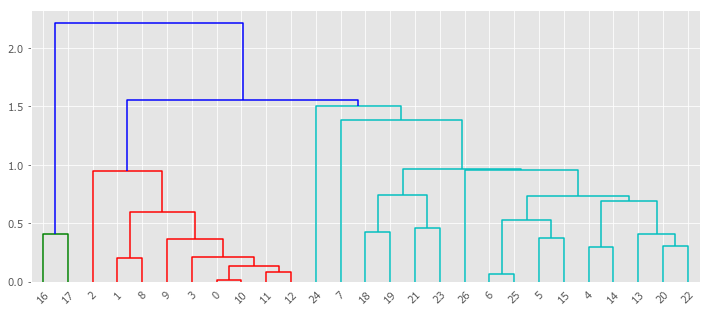

In [74]:
## Your Code Here
Z = linkage(df.values, method='average', metric='cityblock')
labels = fcluster(Z, 2.2, criterion='maxclust')
dend = dendrogram(Z)

In [67]:
labels

array([3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2,
       3, 2, 5, 3, 3], dtype=int32)

# Геоданные

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [ ]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [ ]:
df_geo.head()

In [ ]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

In [ ]:
plot_geo(df_geo.lat.values, df_geo.lon.values, labels=None)

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [ ]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше (например MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер

In [ ]:
nn = NearestNeighbors()


Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Изобразите координаты точек, не попавших в кластер выбросов (метка -1)